In [ ]:
pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from fcmeans import FCM
import matplotlib.pyplot as plt
import math

In [ ]:
# df=pd.read_csv('^NSEI.csv')
df=pd.read_csv('^CRSLDX.csv')
# df=pd.read_csv('ADANIENT.NS.csv')
df.replace('null', np.nan, inplace=True)
df=df.dropna()
# df = df.iloc[::-1]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-26,2195.750000,2247.500000,2195.750000,2245.399902,2245.396973,0.0
1,2005-09-27,2246.250000,2274.800049,2241.300049,2259.350098,2259.347168,0.0
2,2005-09-28,2261.300049,2282.399902,2250.649902,2280.350098,2280.347168,0.0
3,2005-09-29,2289.550049,2302.300049,2275.550049,2281.750000,2281.747070,0.0
4,2005-09-30,2284.100098,2284.899902,2242.850098,2274.000000,2273.997070,0.0


In [ ]:
df=np.array(df)
print(df)

[['2005-09-26' 2195.75 2247.5 ... 2245.399902 2245.396973 0.0]
 ['2005-09-27' 2246.25 2274.800049 ... 2259.350098 2259.347168 0.0]
 ['2005-09-28' 2261.300049 2282.399902 ... 2280.350098 2280.347168 0.0]
 ...
 ['2023-04-03' 14621.049805 14621.049805 ... 14601.950195 14601.950195
  13824900.0]
 ['2023-04-05' 14620.700195 14718.900391 ... 14709.400391 14709.400391
  13452400.0]
 ['2023-04-06' 14701.099609 14786.0 ... 14759.200195 14759.200195
  13016900.0]]


In [ ]:
num_samples = df.shape[0]
print(num_samples)

4314


In [ ]:
closingPrice = []
for i in range(0,num_samples):
  closingPrice.append(df[i][4])
print(closingPrice)

[2245.399902, 2259.350098, 2280.350098, 2281.75, 2274.0, 2299.449951, 2327.75, 2313.25, 2270.050049, 2264.100098, 2253.600098, 2264.0, 2226.25, 2181.050049, 2172.600098, 2157.899902, 2105.649902, 2085.149902, 2119.449951, 2092.050049, 2108.5, 2098.199951, 2052.050049, 2022.150024, 2067.800049, 2106.399902, 2141.949951, 2173.0, 2166.600098, 2177.25, 2220.199951, 2227.149902, 2245.25, 2259.550049, 2269.0, 2255.25, 2233.899902, 2255.5, 2274.699951, 2300.699951, 2346.850098, 2336.800049, 2306.149902, 2342.300049, 2345.149902, 2319.699951, 2318.449951, 2339.75, 2350.899902, 2385.850098, 2402.5, 2427.899902, 2425.699951, 2401.199951, 2425.399902, 2452.649902, 2446.850098, 2445.5, 2454.350098, 2426.100098, 2377.25, 2424.649902, 2422.050049, 2440.300049, 2459.199951, 2464.25, 2502.550049, 2522.550049, 2525.399902, 2537.300049, 2540.399902, 2512.050049, 2502.050049, 2502.75, 2486.149902, 2473.649902, 2455.75, 2506.300049, 2529.100098, 2517.75, 2532.5, 2548.600098, 2587.5, 2570.149902, 2585.9499

In [ ]:
ret = np.zeros(num_samples)
mean_ret = 0
for i in range(1,num_samples):  
  x=float(math.log(df[i][4]/df[i-1][4]))
  ret[i]=x
  mean_ret = mean_ret + x
# ret = [float(x) for x in ret]
mean_ret /= (num_samples-1)
print(ret[1:])
print(mean_ret)

[0.00619357 0.00925178 0.00061371 ... 0.00302475 0.00733168 0.00337986]
0.0004365831196326824


In [ ]:
time=np.linspace(1,num_samples,num=num_samples)
print(time)

[1.000e+00 2.000e+00 3.000e+00 ... 4.312e+03 4.313e+03 4.314e+03]


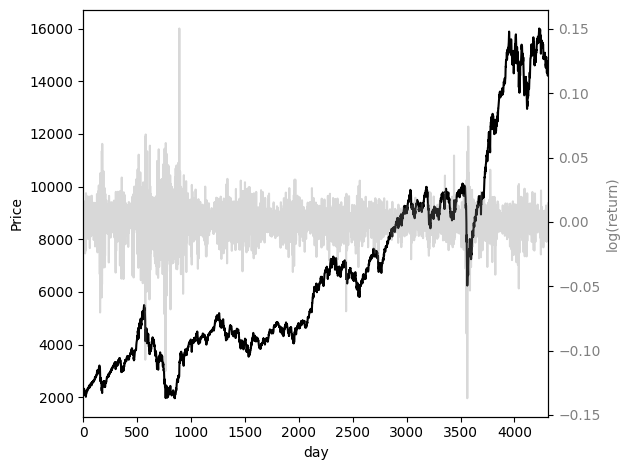

In [ ]:
t=time
data1 = closingPrice
data2 = ret
fig, ax1 = plt.subplots()
color = 'k'
ax1.set_xlabel('day')
ax1.set_ylabel('Price', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'grey'
ax2.set_ylabel('log(return)', color=color)
ax2.plot(t, data2, color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.xlim(0,num_samples)
plt.show()

In [ ]:
corr = []
var = 0
for i in range(1,num_samples):
  var+=(ret[i]-mean_ret)*(ret[i]-mean_ret)
for lag in range(1,21):
  cov=0
  for i in range(lag+1,num_samples):
    cov+=(ret[i]-mean_ret)*(ret[i-lag]-mean_ret)
  corr.append(cov/var)
print(corr)

[0.07939616486426075, 0.005389268627659662, -0.0032836362165126814, -0.01961202674048902, 0.01729404978458884, -0.03408487799743258, 0.053872859253470906, 0.025666844761923078, 0.020577119360263255, 0.034948013548184234, -0.03256592677370503, 0.02847549265581731, 0.006096923850770776, 0.023194202255923148, 0.021251834308242054, -0.006097977816605726, 0.05247471541925726, -0.004117812278602698, -0.033713251658928814, -0.022712864624684227]


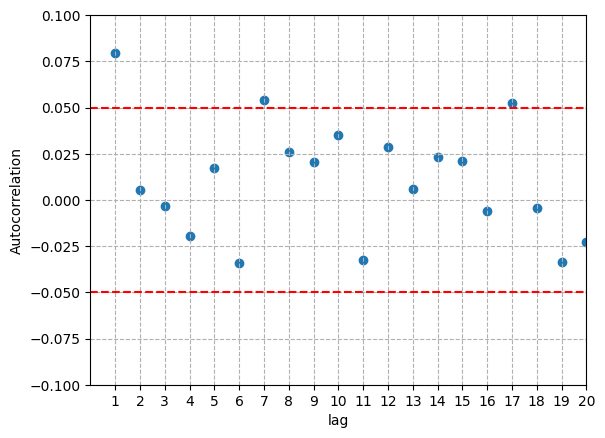

In [ ]:
X = np.linspace(1,20,num=20)
# print(X)
plt.hlines(+0.050,0,20,'red','--')
plt.hlines(-0.050,0,20,'red','--')
# plt.vlines(7,-0.1,0.0629,'k','--')
plt.scatter(X,corr)
plt.xlabel('lag')
plt.ylabel('Autocorrelation')
plt.xlim(0,20)
plt.ylim(-0.1,0.1)
plt.xticks(X)
plt.grid(linestyle='--')
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

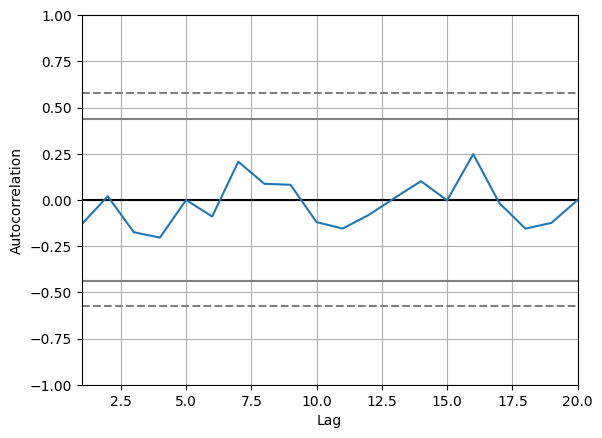

In [ ]:
X = np.linspace(1,20,num=20)
pd.plotting.autocorrelation_plot(corr)

In [ ]:
#calculate standard deviation of the return series
std_dev = 0
for i in range(1,num_samples):
  std_dev += (ret[i]-mean_ret)**2
std_dev /= (num_samples-2)
std_dev = math.sqrt(std_dev)
print(std_dev)

0.01351965342571443


In [ ]:
#calculate local standard deviation of return series
local_std_dev = []
for i in range(20,num_samples):
  local_dev = 0
  local_mean = 0
  for j in range(i-20+1,i+1):
    local_mean += ret[j]
  local_mean /= 20
  for j in range(i-20+1,i+1):
    local_dev += (ret[j]-local_mean)**2
  local_dev /= 19
  local_dev = math.sqrt(local_dev)
  local_std_dev.append(local_dev)
print(local_std_dev)
print(len(local_std_dev))

[0.011728702462769535, 0.011524321493704094, 0.011809476843844742, 0.011902840617172235, 0.01348740343672055, 0.014033399922292702, 0.014346740204706257, 0.014919496031177345, 0.014453862494691763, 0.014543588525845046, 0.015293873362173561, 0.015270200129033755, 0.0149085635611022, 0.014111767695944221, 0.014056877667706389, 0.014033911977528407, 0.01288471318120391, 0.012602453810606089, 0.012315478563364396, 0.011786616732806605, 0.012249760877834817, 0.012223813766042048, 0.011279401439280377, 0.010374888413064456, 0.009830668724346736, 0.01010491944748275, 0.009765611880541175, 0.009538422940243768, 0.00941059311495294, 0.00970908247667557, 0.009075726959473302, 0.009190336239409997, 0.009215885545368932, 0.009707307018764924, 0.00983076246875222, 0.009717711671348984, 0.009310076172762508, 0.009296424405595551, 0.009237800175667717, 0.009663642288089896, 0.010068661649135746, 0.010852420961171299, 0.01029162256995607, 0.009902363468812273, 0.009979908099605007, 0.0094800684991079

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,

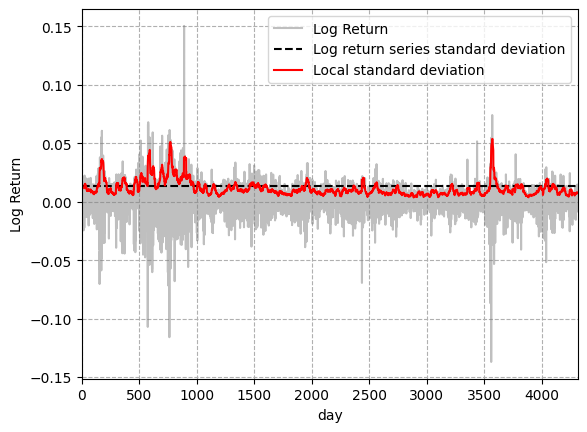

In [ ]:
X = list(range(20,num_samples))
print(X)
plt.plot(time,ret,color='grey',alpha=0.5)
plt.hlines(std_dev,0,num_samples,'k','--')
plt.plot(X,local_std_dev,color='red')
plt.legend(['Log Return','Log return series standard deviation','Local standard deviation'])
plt.xlabel('day')
plt.ylabel('Log Return')
plt.xlim(0,num_samples)
# plt.ylim(-1,1)
plt.grid(linestyle='--')
plt.show()

In [ ]:
prev = [1,7]
n=len(prev)
df = np.zeros(shape=(num_samples-20, n+1))
for i in range (20,num_samples):
  for j in range(n):
    df[i-20][n-(j+1)] = ret[i-prev[j]]
  if local_std_dev[i-20]>std_dev:
    df[i-20][n] = 1
print(df)
print(df.shape)

[[-0.02051212 -0.01301213  0.        ]
 [-0.00388178  0.00783232  0.        ]
 [-0.00678917 -0.00489698  0.        ]
 ...
 [ 0.00337361  0.01468709  0.        ]
 [-0.00390807  0.00302475  0.        ]
 [-0.00868822  0.00733168  0.        ]]
(4294, 3)


In [ ]:
# K-Means algorithm
# K = 3
# size = df.shape[0]
# centroids = [df[0][:], df[1][:], df[2][:]]
# clusters = [[],[],[]]

# for itr in range(5):
#   # empty existing clusters
#   for i in range(K):
#     clusters[i].clear()
#   # make clusters
#   for i in range(size):
#     dist = []
#     for j in range(K):
#       if len(centroids[j])>0:
#         d = 0
#         for k in range(8):
#             d += (df[i][k]-centroids[j][k])**2
#         dist.append(d)
#       else:
#         dist.append(float('inf'))
#     minDist = float('inf')
#     index = -1
#     for j in range(0,K):
#       if dist[j]<minDist:
#         minDist = dist[j]
#         index = j
#     clusters[index].append(i)

#   # find centroids of each cluster
#   for i in range(K):
#     n = len(clusters[i])
#     if n==0:
#       centroids[i].clear()
#       continue
#     c = []
#     for j in range(8):
#       c.append(0)
#     for j in range(8):
#       for k in range(n):
#         c[j] += df[clusters[i][k]][j]
#       c[j] /= n
#     centroids[i] = c 

# print("centroids = ",centroids)
# print("clusters = ",clusters)
# print(clusters[0])
# print(clusters[1])
# print(clusters[2])
# print(len(clusters[0]))
# print(len(clusters[1]))
# print(len(clusters[2]))

In [ ]:
# K-Means algorithm
def kmeans(df, K=3):
  kmeans = KMeans(n_clusters=K, random_state=0, n_init="auto").fit(df)
  labels = kmeans.labels_
  # print(labels)
  # print(kmeans.cluster_centers_)
  clusters = [[]]*K
  # cnt0=0
  # cnt1=0
  # cnt2=0
  # print(len(labels))
  for i in range(len(labels)):
    clusters[labels[i]].append(i)
    # if labels[i] == 0:
    #   cnt0+=1
    # elif labels[i] == 1:
    #   cnt1+=1
    # else:
    #   cnt2+=1
  return kmeans, clusters
  # print(cnt0, cnt1, cnt2, sep=",")

In [ ]:
# Fuzzy C-Means algorithm
def fcm(df, K=3):
  fcm = FCM(n_clusters=K)
  fcm.fit(df)
  labels = fcm.predict(df)
  # print(df.shape)
  clusters = [[]]*K
  # cnt0=0
  # cnt1=0
  # cnt2=0
  # print(len(labels))
  # print(labels)
  for i in range(len(labels)):
    clusters[labels[i]].append(i)
  #   if labels[i] == 0:
  #     cnt0+=1
  #   elif labels[i] == 1:
  #     cnt1+=1
  #   else:
  #     cnt2+=1
  return fcm, clusters
  # print(cnt0, cnt1, cnt2, sep=",")

In [ ]:
#fcm.predict(np.array(df[1233]))
# print(np.array(df[1223].shape))
#fcm.soft_predict(np.array([np.array(df[1233]),np.array(df[1234])]))

In [ ]:
def applySVR(X,y):
  svr = SVR(kernel='rbf')
  svr.fit(X,y)
  return svr
  # y_pred = svr.predict(X)
  # plt.scatter(X, y, color='darkorange', label='data')
  # plt.plot(X, y_pred, color='cornflowerblue', label='prediction')
  # plt.legend()
  # plt.show()
  
def createSVRs(clusters, K=3):
  cluster_svrs = []
  for i in range(K):
    X = []
    y = []
    for j in clusters[i]:
      X.append(df[j])
      y.append(closingPrice[j+20])
    # print(np.array(X).shape, np.array(y).shape)
    svr = applySVR(np.array(X),np.array(y))
    # print(svr.predict([X[-1]]),y[-1],sep="---")
    cluster_svrs.append(svr)
  return cluster_svrs



In [ ]:
print(df.shape)
print(len(closingPrice))

(4294, 3)
4314


In [ ]:
def forecast(clustering = 'km', n_clusters = 3, Start_index = 1212):
  model = None 
  clusters = None
  if(clustering == 'km'):
    model, clusters = kmeans(df, n_clusters)
  elif(clustering == 'hfm' or clustering == 'sfm'):
    model, clusters = fcm(df, n_clusters)
  # print(model.labels_[158])
  SVRs = createSVRs(clusters, n_clusters)
  # print(len(SVRs))
  testdf = df[Start_index:Start_index+20]

  predicted_price = []
  if(clustering == 'km' or clustering == 'hfm'):
      cluster_list = model.predict(testdf)
      # print('clusterlist' , cluster_list, sep = '------')
      for i in range(0,20):
        predicted_price.append(SVRs[cluster_list[i]].predict([testdf[i]])[0])
      return predicted_price
  elif(clustering == 'sfm'):
      cluster_list = model.soft_predict(testdf)
      for i in range(0,20):
        price = 0
        for j in range(n_clusters):
          price += SVRs[j].predict([testdf[i]])[0]* cluster_list[i][j]
        predicted_price.append(price)
      return predicted_price

In [ ]:
start_index = 2396
n_clusters = 5
real_price = closingPrice[start_index+20:start_index+40]
price_kmeans = forecast('km', n_clusters, start_index)
price_hfcmeans = forecast('hfm', n_clusters, start_index)
price_sfcmeans = forecast('sfm', n_clusters, start_index)
print(real_price)
print(price_kmeans)
print(price_hfcmeans)
print(price_sfcmeans)

[7074.950195, 6955.350098, 6935.649902, 6974.149902, 7019.600098, 7106.200195, 7129.0, 7136.299805, 7186.25, 7202.0, 7183.850098, 7157.549805, 7101.100098, 6986.450195, 6976.600098, 7112.5, 7098.700195, 7106.399902, 7125.850098, 7016.950195]
[6216.171872821588, 6215.879750651592, 6215.507230617954, 6216.274402904499, 6215.950077425968, 6215.919674716056, 6215.961521711922, 6216.146729411278, 6215.582708273587, 6216.19290724923, 6216.227085996374, 6216.175346435793, 6215.884369960047, 6216.09240436837, 6215.577879158061, 6216.1747277362365, 6215.446304099966, 6216.272617085804, 6216.273651393772, 6216.141725498236]
[6216.171872821588, 6215.879750651592, 6215.507230617954, 6216.274402904499, 6215.950077425968, 6215.919674716056, 6215.961521711922, 6216.146729411278, 6215.582708273587, 6216.19290724923, 6216.227085996374, 6216.175346435793, 6215.884369960047, 6216.09240436837, 6215.577879158061, 6216.1747277362365, 6215.446304099966, 6216.272617085804, 6216.273651393772, 6216.141725498236

Text(0, 0.5, 'Price')

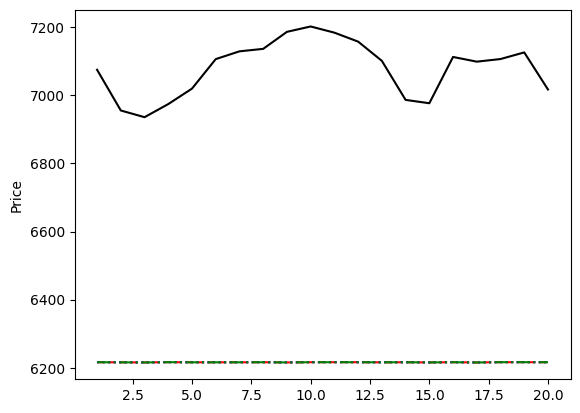

In [ ]:
time=np.linspace(1,20, num = 20)
# Plotting both the curves simultaneously
plt.plot(time, real_price, color='black', label='Real')
plt.plot(time, price_kmeans, 'r--', label='K-Means')
plt.plot(time, price_hfcmeans, 'b:', label='Hard F. C Means')
plt.plot(time, price_sfcmeans,'g-.' , label='Soft F. C-Means')
plt.ylabel("Price")